In [2]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 224.0 kB/s eta 0:00:0000:0100:03


In [3]:
# Import Necessary packages

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols 
from statsmodels.stats.anova import anova_lm, _get_covariance

In [4]:
#importing data

service = pd.read_csv('Services.csv')

In [5]:
service.head()

,Technician,Manufacturer,Job,Service_Time
0,1,1,1,62
1,1,1,2,48
2,1,1,3,63
3,1,1,4,57
4,1,1,5,69


In [6]:
service.shape

(45, 4)

In [7]:
service.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Technician    45 non-null     int64
 1   Manufacturer  45 non-null     int64
 2   Job           45 non-null     int64
 3   Service_Time  45 non-null     int64
dtypes: int64(4)
memory usage: 1.5 KB


In [8]:
service.isnull().sum()

Technician      0
Manufacturer    0
Job             0
Service_Time    0
dtype: int64

In [9]:
service.describe(include ='all').T

,count,mean,std,min,25%,50%,75%,max
Technician,45.0,2.000000,0.825723,1.0,1.0,2.0,3.0,3.0
Manufacturer,45.0,2.000000,0.825723,1.0,1.0,2.0,3.0,3.0
Job,45.0,3.000000,1.430194,1.0,2.0,3.0,4.0,5.0
Service_Time,45.0,55.822222,8.448477,39.0,50.0,56.0,62.0,70.0


In [10]:
service['Technician'].value_counts()

Technician
1    15
2    15
3    15
Name: count, dtype: int64

In [11]:
service['Manufacturer'].value_counts()

Manufacturer
1    15
2    15
3    15
Name: count, dtype: int64

In [12]:
service['Job'].value_counts()

Job
1    9
2    9
3    9
4    9
5    9
Name: count, dtype: int64

# 1. State the Null and Alternate Hypothesis for conducting one-way ANOVA for both the variables ‘Manufacturer’ and ‘Technician' individually.

### The null and alternative hypothesis for Manufacturer.

H0 : The mean service time taken for each manufacturer is same.

H1 : The mean service time taken for each manufacturer is different.

### The null and alternative hypothesis for Technician.

H0 : The mean service time taken for all three technician group is same.

H1 : The mean service time taken for all three technician group is different.


In [13]:
n=service.shape[0]*service.shape[1] #total no of observations
k=service.shape[1] #no of groups

In [14]:
#Degree of freedom between groups
service_bg=k-1
print('Degree of Freedom between groups:',service_bg)
#Degree of freedom within groups
service_wg=n-k
print('Degree of Freedom within groups:',service_wg)

Degree of Freedom between groups: 3
Degree of Freedom within groups: 176


# 2. Perform one-way ANOVA for variable ‘Manufacturer’ with respect to the variable ‘Service Time’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

In [15]:
man = service.drop(['Technician', 'Job'], axis = 1)
man.head()

,Manufacturer,Service_Time
0,1,62
1,1,48
2,1,63
3,1,57
4,1,69


In [16]:
man.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Manufacturer  45 non-null     int64
 1   Service_Time  45 non-null     int64
dtypes: int64(2)
memory usage: 848.0 bytes


In [17]:
man['Manufacturer'] = pd.Categorical(man['Manufacturer'])

In [18]:
f_man = 'Service_Time ~ C(Manufacturer)'
model = ols(f_man, man).fit()
aov_table_man = anova_lm(model)
print(aov_table_man)

                   df       sum_sq    mean_sq         F    PR(>F)
C(Manufacturer)   2.0    28.311111  14.155556  0.191029  0.826822
Residual         42.0  3112.266667  74.101587       NaN       NaN


Since the p-value is greater than the significance level, we cannot reject the null hypothesis.

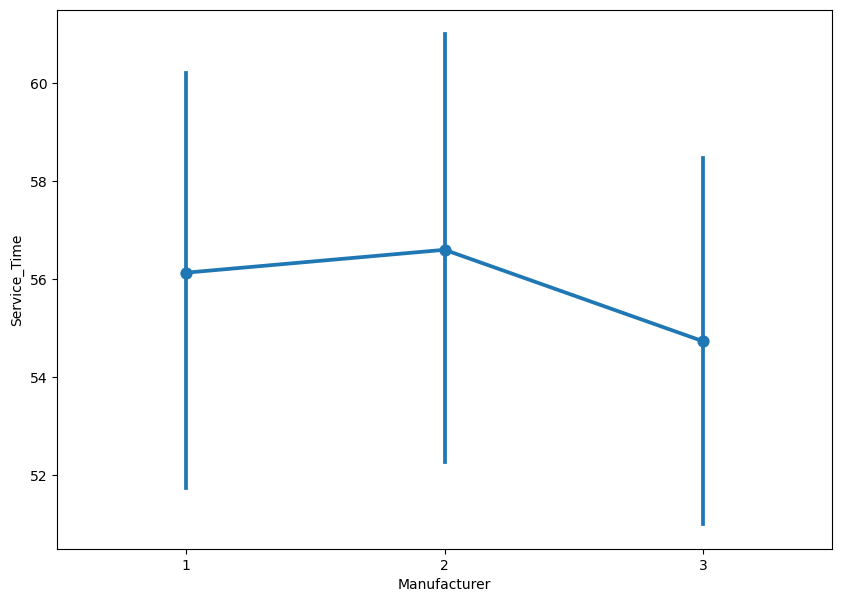

In [19]:
plt.figure(figsize=(10,7))
sns.pointplot(x = 'Manufacturer', y = 'Service_Time', data=man);

In [20]:
man.groupby(man['Manufacturer']).mean()

,Service_Time
Manufacturer,
1,56.133333
2,56.600000
3,54.733333


The pairplot also shows that the service time for each manufacturer is almost same, so the null hypothesis is accepted here.

# 3. Perform one-way ANOVA for variable ‘Technician’ with respect to the variable ‘Service Time’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

In [21]:
tech = service.drop(['Manufacturer', 'Job'], axis=1)
tech.head()

,Technician,Service_Time
0,1,62
1,1,48
2,1,63
3,1,57
4,1,69


In [22]:
tech.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Technician    45 non-null     int64
 1   Service_Time  45 non-null     int64
dtypes: int64(2)
memory usage: 848.0 bytes


In [23]:
tech['Technician'] = pd.Categorical(tech['Technician'])

In [24]:
f_tech = 'Service_Time ~ C(Technician)'
model = ols(f_tech, tech).fit()
aov_table_tech = anova_lm(model)
print(aov_table_tech)

                 df       sum_sq    mean_sq        F    PR(>F)
C(Technician)   2.0    24.577778  12.288889  0.16564  0.847902
Residual       42.0  3116.000000  74.190476      NaN       NaN


Since the p value is  higher, the null hypothesis is true here and the alternative hypothesis is rejected.

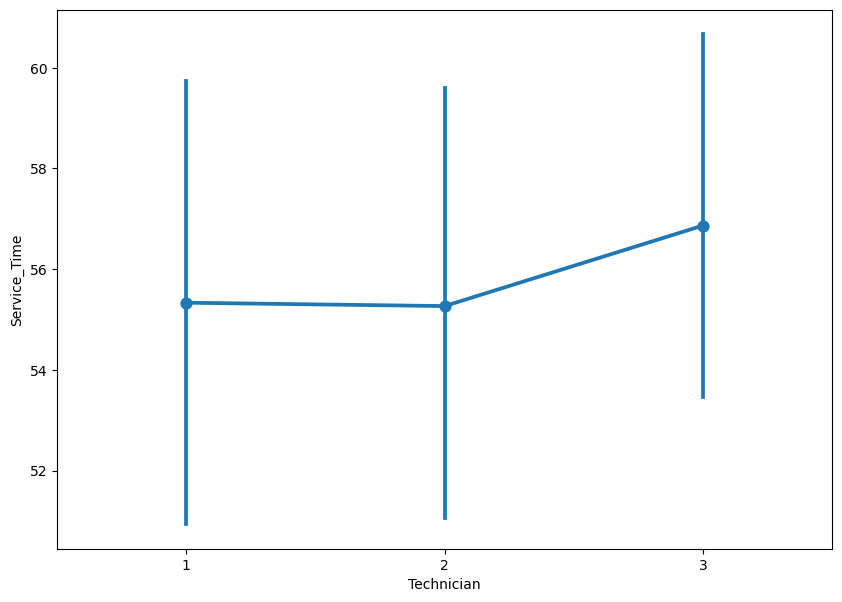

In [25]:
plt.figure(figsize=(10,7))
sns.pointplot(x= 'Technician', y= 'Service_Time', data= tech, );

In [26]:
tech.groupby(tech['Technician']).mean()

,Service_Time
Technician,
1,55.333333
2,55.266667
3,56.866667


# 4.. Analyse the effects of one variable on another with the help of an interaction plot. What is an interaction between two treatments? [Hint: use the ‘pointplot’ function from the ‘seaborn’ graphical subroutine in Python]

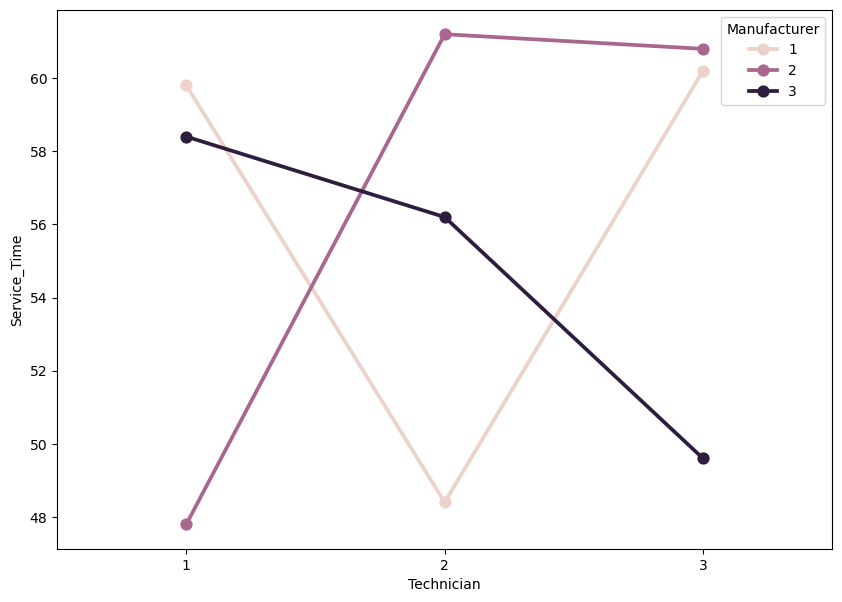

In [27]:
plt.figure(figsize=(10,7))
sns.pointplot(data = service, x= 'Technician', y= 'Service_Time', hue='Manufacturer', ci= None);

# 5. Perform a two-way ANOVA based on the variables ‘Manufacturer’ & ‘Technician’ with respect to the variable ‘Service Time’ and state your results.

In [28]:
formula = 'Service_Time ~ C(Technician) + C(Manufacturer) + C(Technician):C(Manufacturer)'
model = ols(formula, service).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Technician),2.0,24.577778,12.288889,0.236274,0.790779
C(Manufacturer),2.0,28.311111,14.155556,0.272164,0.763283
C(Technician):C(Manufacturer),4.0,1215.288889,303.822222,5.841487,0.000994
Residual,36.0,1872.400000,52.011111,NaN,NaN
